###  Classification problem where the goal is to predict whether a loan would be approved or not.

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")  #ignores the warnings 

### Data

In [3]:
train_data=pd.read_csv("loan_train.csv")
test_data=pd.read_csv("loan_test.csv")

In [4]:
# making a copy of train and test data
train_copy=train_data.copy()
test_copy=test_data.copy()

### Performing EDA on data

In [5]:
train_data.duplicated().sum() #Check Duplicates in Train Data

0

In [6]:
test_data.duplicated().sum() #Check Duplicates in Test Data

0

In [7]:
train_data.shape , test_data.shape

((614, 13), (367, 12))

In [8]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train_data.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### Univariate Analysis

In [12]:
train_data["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Around 69% of Loan applicants in train set are approved and 31% are not approved


### Target Variable (Loan_Status )

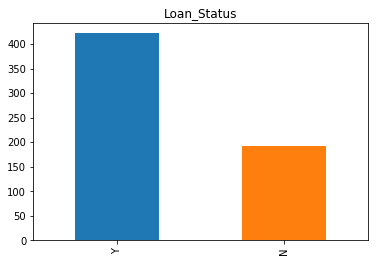

In [13]:
train_data["Loan_Status"].value_counts().plot.bar(title="Loan_Status")

### Categorical Variables 

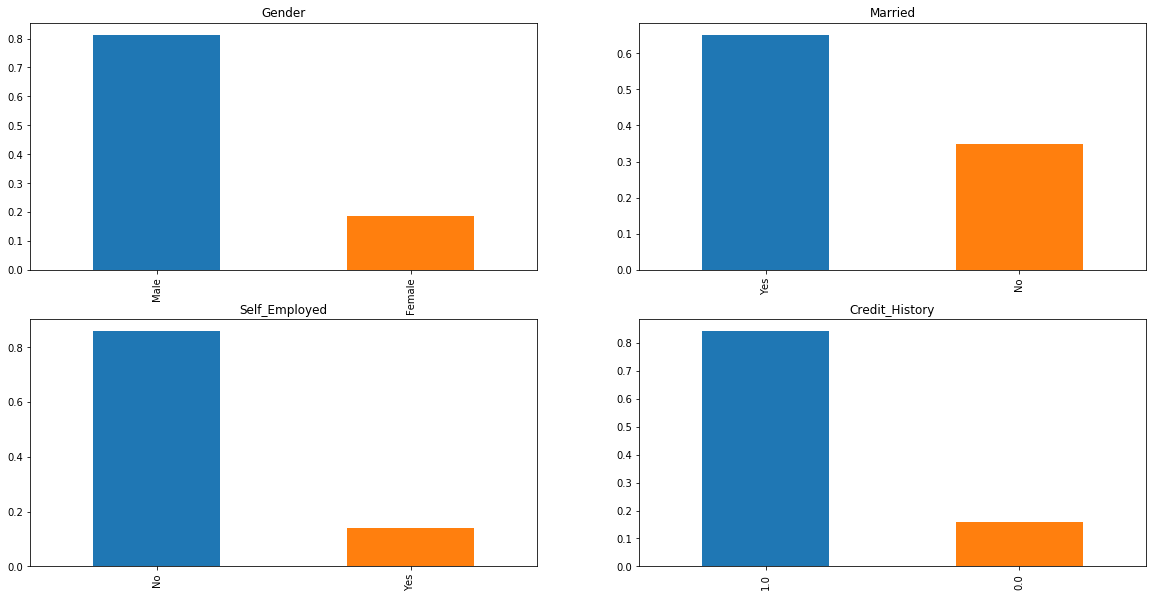

In [14]:
##Categorical Features
plt.figure(1)
plt.subplot(221)
train_data["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train_data["Married"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train_data["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train_data["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")


Around 80% of applicants are male. 65% of applicants are married. Around 15% are self Employed. Around 85% have credit hsitory

### Ordinal Variables 

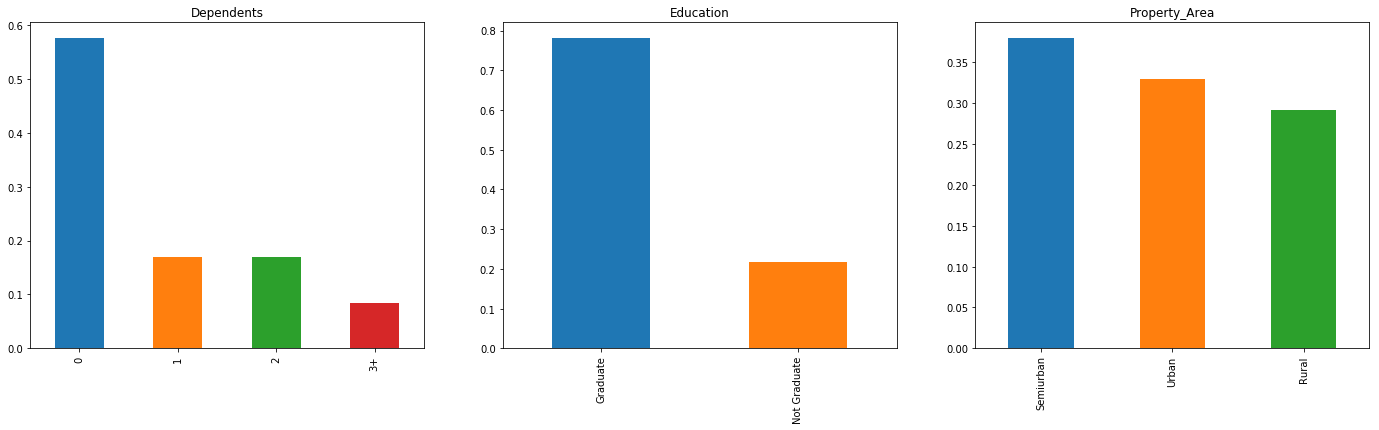

In [15]:
##Ordinal Features
plt.figure(1)
plt.subplot(131)
train_data["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
train_data["Education"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Education")
plt.subplot(133)
train_data["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Property_Area")

Around 58% of the applicants dont have dependents. Most of the applicants are graduates

### Numerical Variables 

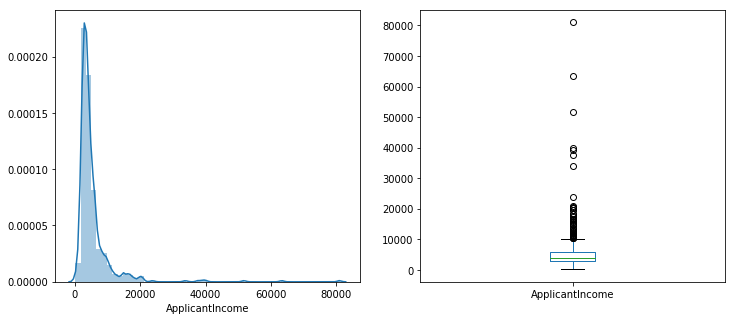

In [16]:
plt.figure(1)
plt.subplot(121)
sb.distplot(train_data["ApplicantIncome"])
plt.subplot(122)
train_data["ApplicantIncome"].plot.box(figsize=(12,5))

Applicant Income is not Normally Distributed and there are many Outliers. It is Right Skewed

Text(0.5,0.98,'')

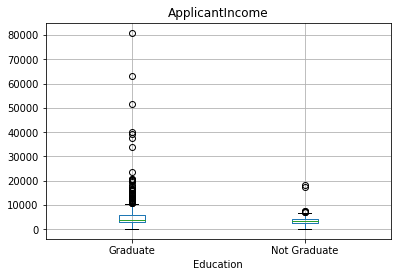

In [17]:
train_data.boxplot(column='ApplicantIncome',by="Education")
plt.suptitle("")

Graduates who are highly paid appears to be outliers and make the distribution right skewed

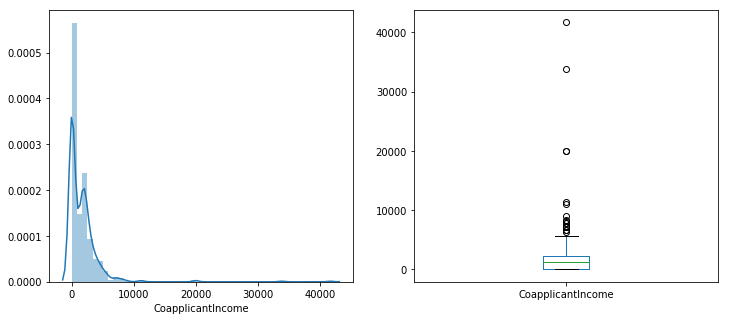

In [18]:
plt.figure(1)
plt.subplot(121)
sb.distplot(train_data["CoapplicantIncome"])
plt.subplot(122)
train_data["CoapplicantIncome"].plot.box(figsize=(12,5))

similar to applicant Income , Coapplicant income is also not normal and is Right skewed with outliers

Text(0.5,0.98,'')

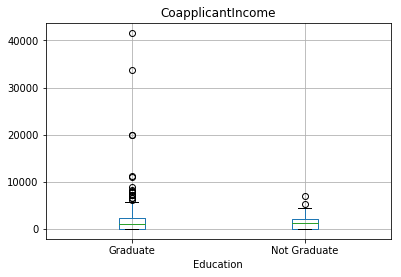

In [19]:
train_data.boxplot(column='CoapplicantIncome',by="Education")
plt.suptitle("")

Outliers are again due to the high salary of the graduates

In [20]:
len(train_data[train_data["LoanAmount"].isnull()])

22

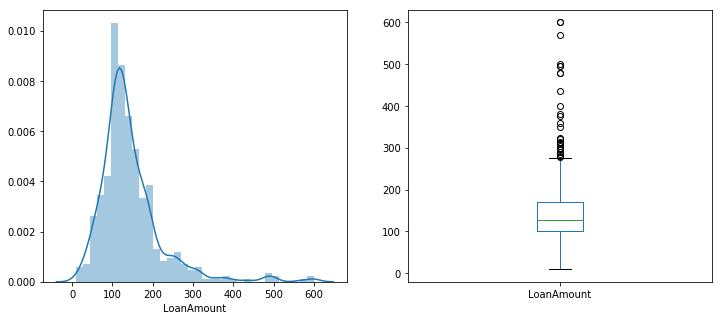

In [21]:
train_without_NA=train_data.dropna()
plt.figure(1)
plt.subplot(121)
sb.distplot(train_without_NA["LoanAmount"])
plt.subplot(122)
train_without_NA["LoanAmount"].plot.box(figsize=(12,5))

The Distribution is fairly Normal with a lot of outliers

### Bivariate Analysis

### Categorical Variables VS Target Variable

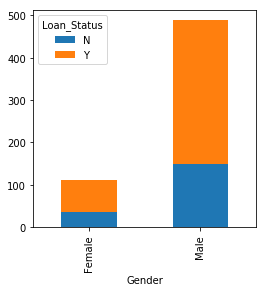

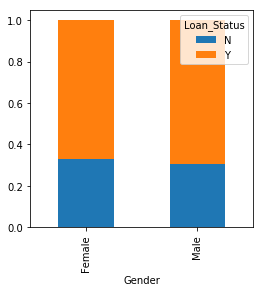

In [22]:
gender=pd.crosstab(train_data.Gender,train_data.Loan_Status)
gender.plot.bar(stacked=True,figsize=(4,4))
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Proportion of approved loan is almost same for Male and Female

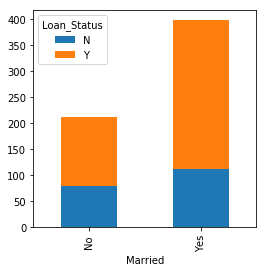

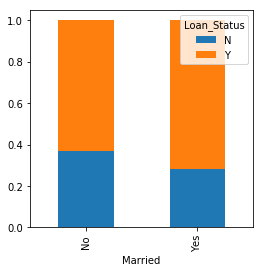

In [23]:
Married=pd.crosstab(train_data.Married,train_data.Loan_Status)
Married.plot.bar(stacked=True,figsize=(4,4))
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Proportion of approved loan is slightly higher for Married people

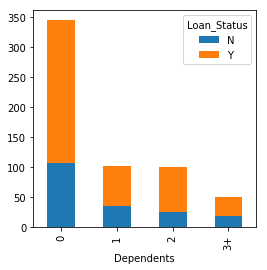

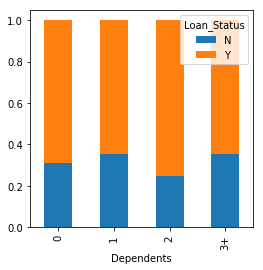

In [24]:
Dependents=pd.crosstab(train_data.Dependents,train_data.Loan_Status)
Dependents.plot.bar(stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

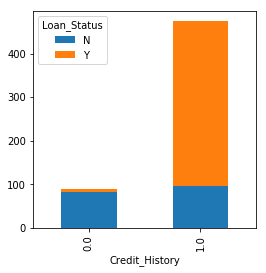

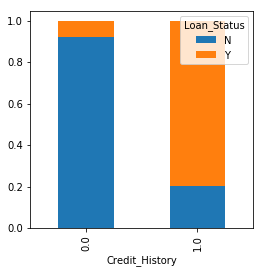

In [25]:
Credit_History=pd.crosstab(train_data.Credit_History,train_data.Loan_Status)
Credit_History.plot.bar(stacked=True,figsize=(4,4))
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Applicants who have credit history are more likely to be approved

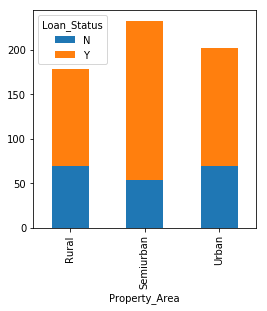

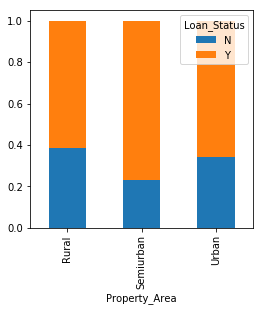

In [26]:
Property_Area=pd.crosstab(train_data.Property_Area,train_data.Loan_Status)
Property_Area.plot.bar(stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Applicants in Semi Urban area has high Loan Approval Rate than in Rural and Urban Area

### Numeric Variables VS Target

In [27]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

Mean income of Approved Applicants and Not Approved applicants does not differ much

In [28]:
train_data["Dependents"].replace('3+',3,inplace=True)
test_data["Dependents"].replace('3+',3,inplace=True)
train_data["Loan_Status"].replace('N',0,inplace=True)
train_data["Loan_Status"].replace('Y',1,inplace=True)

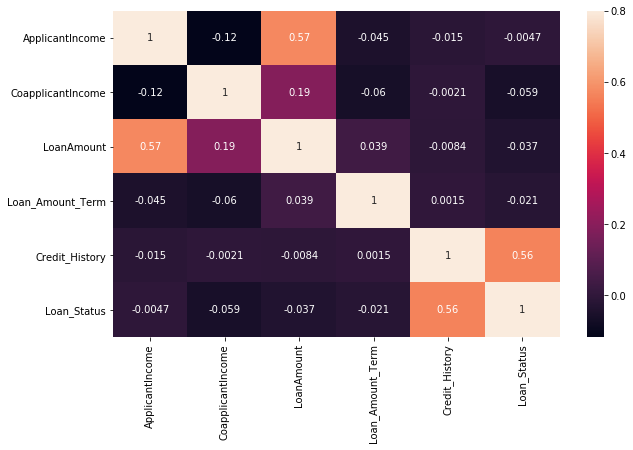

In [29]:
corr_matrix = train_data.corr()
f , ax = plt.subplots(figsize=(10,6))
sb.heatmap(corr_matrix,vmax=0.8, annot=True)

Correlated Pair of variables - (ApplicantIncome-LoanAmount) (Credit_History - LoanStatus)

### handling Missing Data and Outliers

In [30]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train_data['Gender'].mode()[0]

'Male'

In [32]:
train_data["Gender"].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data["Married"].fillna(train_data['Married'].mode()[0],inplace=True)
train_data["Dependents"].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data["Self_Employed"].fillna(train_data['Self_Employed'].mode()[0],inplace=True)

In [33]:
train_data.Credit_History.fillna(train_data.Loan_Status,inplace=True)

In [34]:
pd.crosstab(train_data.Credit_History,train_data.Loan_Status)

Loan_Status,0,1
Credit_History,,
0.0,95,7
1.0,97,415


In [35]:
train_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
train_data["Loan_Amount_Term"].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [37]:
train_data["LoanAmount"].fillna(train_data['LoanAmount'].median(),inplace=True)

In [38]:
test_data["Gender"].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data["Married"].fillna(test_data['Married'].mode()[0],inplace=True)
test_data["Dependents"].fillna(test_data['Dependents'].mode()[0],inplace=True)
test_data["Self_Employed"].fillna(test_data['Self_Employed'].mode()[0],inplace=True)
test_data["Loan_Amount_Term"].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data["LoanAmount"].fillna(test_data['LoanAmount'].median(),inplace=True)

In [39]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

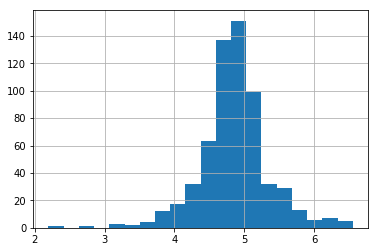

In [40]:
train_data["LoanAmount_log"]=np.log(train_data["LoanAmount"])
test_data["LoanAmount_log"]=np.log(test_data["LoanAmount"])
train_data["LoanAmount_log"].hist(bins=20)

In [41]:
train_data=train_data.drop("Loan_ID",axis=1)
test_data=test_data.drop("Loan_ID",axis=1)
train_data=train_data.drop("LoanAmount_log",axis=1)
test_data=test_data.drop("LoanAmount_log",axis=1)

In [42]:
X=train_data.drop("Loan_Status",axis=1)
y=train_data.Loan_Status


In [43]:
X=pd.get_dummies(X)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
pred=logistic_model.predict(x_test)
accuracy_score(y_test,pred)

0.8486486486486486

In [48]:
submission=pd.DataFrame(columns=['Loan_ID','Loan_Status'])
submission

,Loan_ID,Loan_Status


In [49]:
test_data=pd.get_dummies(test_data)
pred_test=logistic_model.predict(test_data)
submission.Loan_ID=test_copy.Loan_ID
submission.Loan_Status=pred_test
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [50]:
submission.Loan_ID=test_copy.Loan_ID
submission.Loan_Status=pred_test

In [51]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [52]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

### Feature Engineering

In [53]:
train_data["Income"]=train_copy.ApplicantIncome+train_copy.CoapplicantIncome
test_data["Income"]=test_copy.ApplicantIncome+test_copy.CoapplicantIncome

In [54]:
train_data=train_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
test_data=test_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

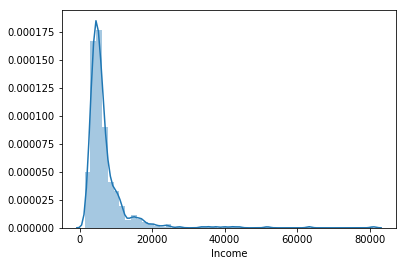

In [55]:
sb.distplot(train_data.Income)

In [56]:
X=train_data.drop("Loan_Status",axis=1)
y=train_data.Loan_Status
X=pd.get_dummies(X)

In [57]:
X.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model1=LogisticRegression()
logistic_model1.fit(x_train,y_train)
pred=logistic_model1.predict(x_test)
accuracy_score(y_test,pred)

0.8054054054054054

In [59]:
test_data=pd.get_dummies(test_data)
pred_test=logistic_model1.predict(test_data)
submission.Loan_ID=test_copy.Loan_ID
submission.Loan_Status=pred_test
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

### 5 Fold Cross validation - Random Forest

In [61]:
i=1
acc=[]
kfold=StratifiedKFold(n_splits=5,random_state=100,shuffle=True)
for train_index, test_index in kfold.split(X,y):
    print("\n {} of kfold {}".format(i,kfold.n_splits))
    x_train,x_test =X.loc[train_index],X.loc[test_index]
    y_train,y_test =y.loc[train_index],y.loc[test_index]
    
    model=RandomForestClassifier(random_state=10,n_estimators=20)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=accuracy_score(y_test,pred)
    print("accuracy is ", score)
    acc.append(score)
    i=i+1
print(" \n Mean Accuracy is", np.mean(acc))


 1 of kfold 5
accuracy is  0.8145161290322581

 2 of kfold 5
accuracy is  0.8145161290322581

 3 of kfold 5
accuracy is  0.7786885245901639

 4 of kfold 5
accuracy is  0.7459016393442623

 5 of kfold 5
accuracy is  0.8114754098360656
 
 Mean Accuracy is 0.7930195663670017


In [62]:
 model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)>

### Grid Search for identify best values for parameters

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [x for x in range(2,15,2)],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [x for x in range(2,15,2)],
    'n_estimators': [x for x in range(10,80,10)]
}
rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
grid_search_fit=grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 70}

In [64]:
rf_final=RandomForestClassifier(random_state=1,max_depth=4,min_samples_leaf=4,min_samples_split=10,n_estimators=
                               70)

In [65]:
rf_final.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [66]:
pred=rf_final.predict(x_test)
score=accuracy_score(y_test,pred)
print("accuracy is ", score)

accuracy is  0.8594594594594595


In [67]:
test_data.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Income'],
      dtype='object')

In [68]:
test_data=pd.get_dummies(test_data)
pred_test=rf_final.predict(test_data)
submission.Loan_ID=test_copy.Loan_ID
submission.Loan_Status=pred_test
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Variable Importance Plot to identify best varibales

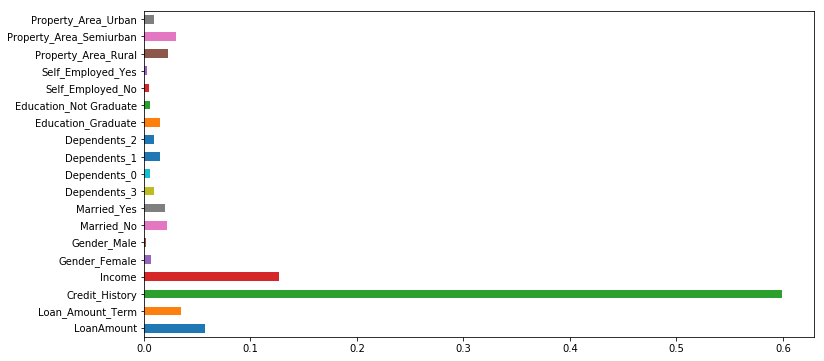

In [69]:
importances=pd.Series(rf_final.feature_importances_,X.columns)
importances.plot(kind="barh",figsize=(12,6))

We can clearly observe that Credit History , Income and Loan Amount are the most important features in predicting the loan status